In [10]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
newCases = np.genfromtxt('model.txt')[:,1]
totalN = len(newCases)
tSpan = np.linspace(0, totalN-1, totalN)
t0, t1, t2, b0, b1, b2, g, i0, m = 2, 4, 87, 4.6e-2, 7.8e-3, 7.8e-2, 0.02, 0.0023, 1700
par = np.array([t0, t1, t2, b0, b1, b2, g, i0, m])
s0, i0, r0 = 1, i0, 0
s, i, r = s0, i0, r0
IC = state = np.array([s,i,r])
stateDim, parDim = len(IC), len(par)
def F(t,state,par):
    s, i, r = state
    t0, t1, t2, b0, b1, b2, g, i0, m = par
    if t <= t0:
        b = 0
    elif t <= t0 + t1:
        b = b0
    elif t <= t0 + t1 + t2:
        b = b1
    else:
        b = b2    
    return np.array([-b*s*i,b*s*i-g*i,g*i])
def process(par):
    sol = solve_ivp(fun=lambda t,z: F(t,z,par), t_span=(tSpan[0],tSpan[-1]),y0=state, t_eval=tSpan, method='RK45',rtol=1e-6,atol=1e-6)
    newCases = par[-1]*sol.y[1,:]
    return newCases
def penalty(par):
    output = process(par)
    Lval = np.sum((output-newCases)**2)
    return Lval        

bds = np.array([[1e-6,1e2],[1e-6,1e2],[1e-6,1e2],[1e-6,1e0],[1e-6,1e0],[1e-6,1e0],[1e-6,1e0],[1e-6,1e0],[1e0,1e4]])
x0 = par
result = minimize(penalty, result.x, method='Nelder-Mead', options={'adaptive': True, 'disp': True, 'maxiter': 10000, 'maxfev': 10000}, bounds = bds)    

/var/folders/pp/16tdg6v54nqgg6vt1rl38ljw0011vy/T/ipykernel_65208/220548236.py:37: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(penalty, result.x, method='Nelder-Mead', options={'adaptive': True, 'disp': True, 'maxiter': 10000, 'maxfev': 10000}, bounds = bds)


Text(0.5, 1.0, 'Nevada')

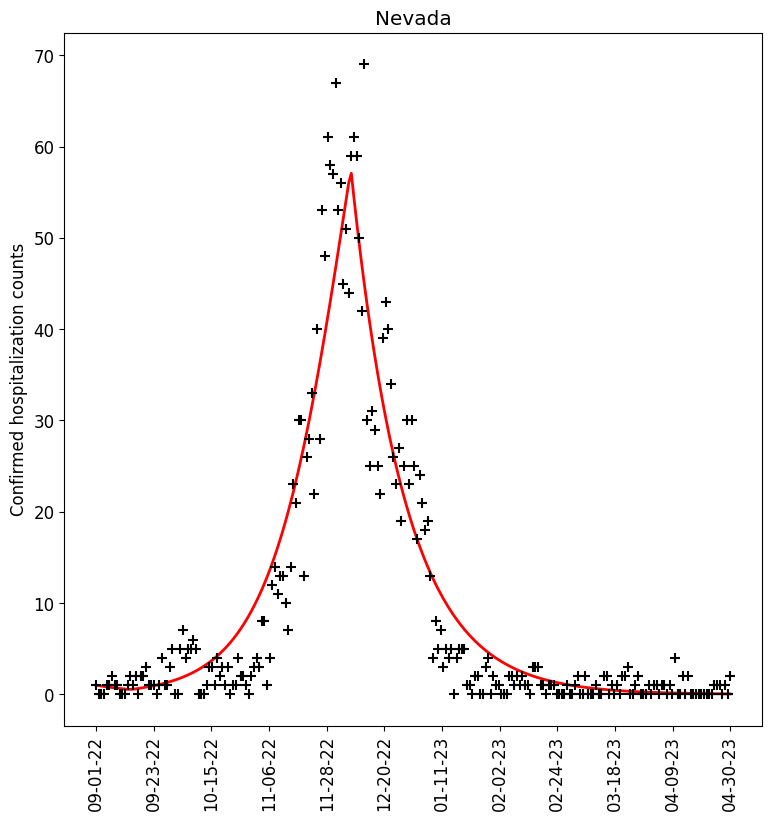

In [11]:
plt.rcParams.update({'font.size':12})
fig = plt.figure()
fig.set_size_inches(9,9)
ax = plt.subplot(1,1,1)
ax.scatter(tSpan, newCases, 60, marker='+', color = 'black', zorder = 500)
ax.plot(tSpan,process(result.x), color='red', linewidth = 2)           
ax.set_xticks(np.linspace(0,len(newCases)-1,12))
ax.set_xticklabels(['09-01-22','09-23-22','10-15-22','11-06-22','11-28-22','12-20-22','01-11-23','02-02-23','02-24-23','03-18-23','04-09-23','04-30-23'],rotation=90)
ax.set_ylabel('Confirmed hospitalization counts')
ax.set_title('Nevada')
# plt.savefig('/Users/amallela/Documents/sensitivity/writing/p0.pdf',dpi=600)

In [12]:
result.x

array([4.84662268e-01, 1.11819143e+01, 8.51532029e+01, 2.50700844e-05,
       1.10986446e-01, 3.06869071e-04, 4.86765522e-02, 1.73584963e-02,
       4.37452905e+02])

In [13]:
result.fun

6560.012846028288